# Titanic: Machine Learning from Disaster
## Start here! Predict survival on the Titanic and get familiar with ML basics

首先需要查看一下当前使用的训练数据内容，点击运行下面的cell（以后不再复述此操作）

In [12]:
%matplotlib inline

import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

data_train = pd.read_csv("/home/pytest/data/Titanic/train.csv", sep=",")
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


可以看到一共有891条记录，12个字段。每个字段的含义如下所示：

- PassengerId => 乘客ID
- Survived => 是否存活（0否1是）
- Pclass => 乘客等级(1/2/3等舱位)
- Name => 乘客姓名
- Sex => 性别
- Age => 年龄
- SibSp => 堂兄弟/妹个数
- Parch => 父母与小孩个数
- Ticket => 船票信息
- Fare => 票价
- Cabin => 客舱
- Embarked => 登船港口

## 泰坦尼克号问题之背景

就是那个大家都熟悉的『Jack and Rose』的故事，豪华游艇撞上了巨大的冰山，大家都惊恐逃生，可是救生艇的数量有限，无法人人都有，副船长发话了“lady and kid first！”，所以是否获救其实并非随机，而是基于一些背景，有rank先后的。

训练和测试数据是一些乘客的个人信息以及存活状况，要尝试根据它生成合适的模型并预测其他人的存活状况。

对，这是一个二分类问题，是logistic regression所能处理的范畴。

先查看一下各个字段的统计情况。

In [50]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


有
- 2个浮点型字段（Age，Fare）
- 5个整型字段（PassengerId,Survived,Pclass,SibSp,Parch）
- 5个对象型字段（Name,Sex,Ticket,Cabin,Embarked）

其中Cabin字段缺失比较严重，891条记录中只有204条有值。Age字段也缺少了不少，714/891。

对于数值型数据，可以进一步查看一下它们的分布（对象型字段是无法看到分布的）

In [54]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


下面进入关键步骤，首先需要分析每个字段和最终结果（Survived）之间的关系

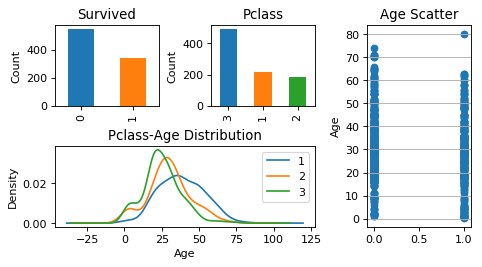

In [52]:
fig = plt.figure(figsize=(8,6), dpi=80)
fig.set(alpha=0.2)

# plot with various axes scales
gs = GridSpec(2, 3, top=0.5, bottom=0.08, left=0.30, right=0.95, hspace=0.5,
                    wspace=0.5)

# Survived
plt.subplot(gs[0, 0])
data_train.Survived.value_counts().plot(kind='bar') 
plt.title(u"Survived")
plt.ylabel(u"Count")  

# Pclass
plt.subplot(gs[0, -2])
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"Count")
plt.title(u"Pclass")

# Age Scatter
plt.subplot(gs[:, -1])
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"Age") 
plt.grid(b=True, which='major', axis='y') 
plt.title(u"Age Scatter")

# Pclass-Age
plt.subplot(gs[1, :-1])
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"Age")
plt.ylabel(u"Density") 
plt.title(u"Pclass-Age Distribution")
plt.legend((u'1', u'2', u'3'),loc='best')

# Embarked
#plt.subplot(gs[1, -1])
#data_train.Embarked.value_counts().plot(kind='bar')
#plt.title(u"Embarked")
#plt.ylabel(u"Count")

plt.show()

- 第一张图显示了存活的人不到半数（悲剧啊！）
- 第二张图显示了船上三等舱的人数很多，一等舱和二等舱的人数差不多
- 第三张图显示了存活的乘客和遇难的乘客在年龄分布上基本类似，只是在70岁上下有比较明显的区别（应该不是重要的区分特征）
- 第四张图显示了不同舱位等级乘客的年龄分布，显然舱位等级越高，年龄的中位数就越大（似乎和我们的常识吻合）

上面展示了对特征的不同分析方法，接下来我们可以根据常识进行一些推断，然后用对应的分析方法来进行验证

猜想1: 不同舱位的船票价格是不同的

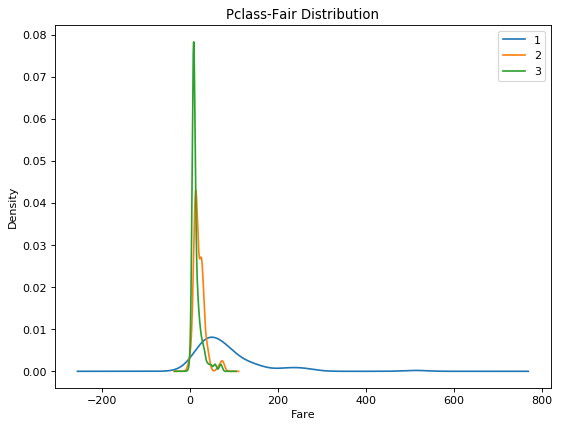

In [5]:
fig = plt.figure(figsize=(8,6), dpi=80)
fig.set(alpha=0.2)

# Pclass-Fare
data_train.Fare[data_train.Pclass == 1].plot(kind='kde')   
data_train.Fare[data_train.Pclass == 2].plot(kind='kde')
data_train.Fare[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"Fare")
plt.ylabel(u"Density") 
plt.title(u"Pclass-Fair Distribution")
plt.legend((u'1', u'2', u'3'),loc='best')

plt.show()

这个图实在是不好看，有几个票价高得离谱的记录直接把分布图压扁了，显然这样的数据点可能带来得误差要比贡献更大。
为了能够更好地分析绝大多数案例，有必要把这几个点给去除掉。

In [6]:
data_train_remove_highFare = data_train[data_train.Fare < 50]
data_train_remove_highFare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    730 non-null int64
Survived       730 non-null int64
Pclass         730 non-null int64
Name           730 non-null object
Sex            730 non-null object
Age            576 non-null float64
SibSp          730 non-null int64
Parch          730 non-null int64
Ticket         730 non-null object
Fare           730 non-null float64
Cabin          82 non-null object
Embarked       730 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 74.1+ KB


把票价在50以上的数据去掉后，剩余了730条记录，比原来少了不少，现不管了，来看看新的分布

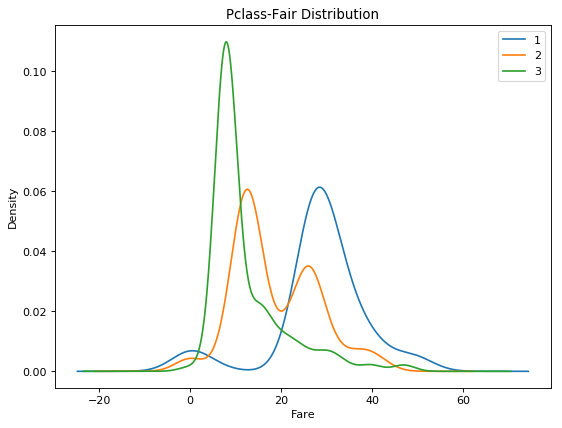

In [7]:
fig = plt.figure(figsize=(8,6), dpi=80)
fig.set(alpha=0.2)

# Pclass-Fare
data_train_remove_highFare.Fare[data_train_remove_highFare.Pclass == 1].plot(kind='kde')   
data_train_remove_highFare.Fare[data_train_remove_highFare.Pclass == 2].plot(kind='kde')
data_train_remove_highFare.Fare[data_train_remove_highFare.Pclass == 3].plot(kind='kde')
plt.xlabel(u"Fare")
plt.ylabel(u"Density") 
plt.title(u"Pclass-Fair Distribution")
plt.legend((u'1', u'2', u'3'),loc='best')

plt.show()

是不是漂亮了许多，但也可以看出来，票价和舱位并不是完全对应的，显然这两个特征之间存在比较强的关联，但也存在一定的差异。下面我们再来看看舱位和最终存活与否之间的关联。

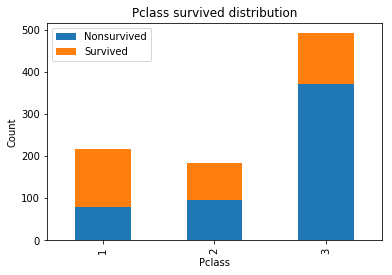

In [11]:
#看看各乘客等级的获救情况
Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'Survived':Survived_1, u'Nonsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Pclass survived distribution")
plt.xlabel(u"Pclass") 
plt.ylabel(u"Count") 

plt.show()

很显然，遇难的以3等舱的居多，超过了平均水平，而头等舱的乘客获救的概率要比另外两个舱位的乘客高不少。这说明关键时刻，有钱还是能救命的啊！

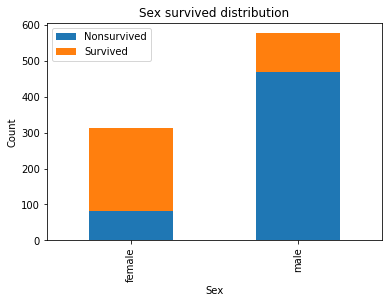

In [10]:
#看看各性别的获救情况
Survived_0 = data_train.Sex[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Sex[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'Survived':Survived_1, u'Nonsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Sex survived distribution")
plt.xlabel(u"Sex") 
plt.ylabel(u"Count") 

plt.show()

哇，女性获救的概率果然很高啊！看来电影里演的Lady First并不是骗我们的。

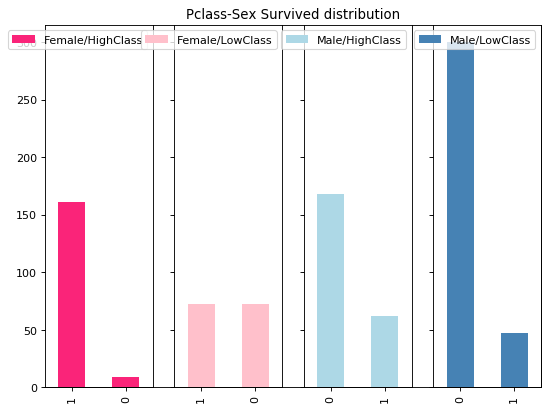

In [44]:
#然后我们再来看看舱位和性别特征组合后的情况

fig = plt.figure(figsize=(8,6), dpi=80)
fig.set(alpha=0.2)

# plot with various axes scales
gs = GridSpec(1, 4, top=0.5, bottom=0.08, left=0.30, right=0.95, hspace=0.5,
                    wspace=0.5)

plt.title(u"Pclass-Sex Survived distribution")

# disable x,y axis ticks
plt.xticks([])
plt.yticks([])

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts()\
    .plot(kind='bar', label="female highclass", color='#FA2479')
#ax1.set_xticklabels([u"1", u"0"], rotation=0)
ax1.legend([u"Female/HighClass"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts()\
    .plot(kind='bar', label='female, low class', color='pink')
#ax2.set_xticklabels([u"0", u"1"], rotation=0)
plt.legend([u"Female/LowClass"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts()\
    .plot(kind='bar', label='male, high class',color='lightblue')
#ax3.set_xticklabels([u"0", u"1"], rotation=0)
plt.legend([u"Male/HighClass"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts()\
    .plot(kind='bar', label='male low class', color='steelblue')
#ax4.set_xticklabels([u"0", u"1"], rotation=0)
plt.legend([u"Male/LowClass"], loc='best')

plt.show()

很好，和预计的情况一致，这两个特征组合中一起，更加能够加强预测的效果。

In [45]:
#cabin只有204个乘客有值，我们先看看它的一个分布
data_train.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

Cabin这个特征只有204个乘客有值，而且分布如上图所示，非常分散，丝毫看不出特点来，如果按照条目式特征进行独热编码，效果一定不好。换个思路，干脆以有无Cabin这个值作为特征，看看和存活与否之间的关联分布

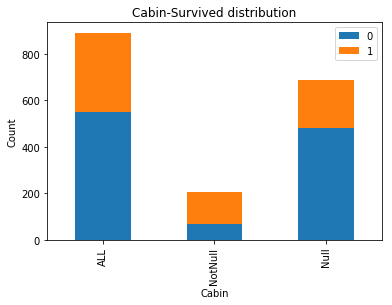

In [48]:
Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
Survived_all = data_train.Survived.value_counts()
df=pd.DataFrame({u'NotNull':Survived_cabin, u'Null':Survived_nocabin, u'ALL':Survived_all}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"Cabin-Survived distribution")
plt.xlabel(u"Cabin") 
plt.ylabel(u"Count")
plt.show()

感觉这个分布的区分度还算可以，非空Cabin的分布是存活多、遇难少，而Cabin为空的分布是存活少、遇难多，看来可以用上。

In [1]:
import ipython_importer
import apollo_utils
import time

rf = "kaggle_titanic.ipynb"
of = "kaggle_titanic.html"

apollo_utils.save_notebook()
time.sleep(3)
apollo_utils.output_HTML(rf, of)